# Составување на сигнал од неговите компоненети

Еден добар пример кој покажува како еден сигнал се изразува преку своите синусни (или експоненцијални) компоненти. Општ израз (инверзна ДФТ) $x[n] = \sum_{k=0}^{N-1}X[k] e^{j \frac{2\pi}{N} n k}$ Израз преку амплитудите и фазите на компонентите $x[n] = \sum_{k=0}^{N-1}A_k e^{j\phi_k} e^{j \frac{2\pi}{N} n k}$

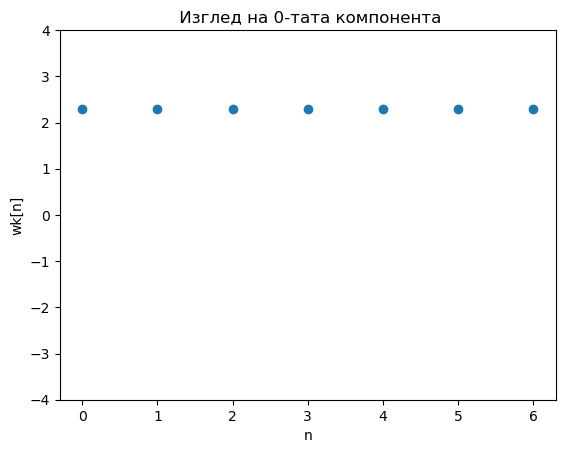

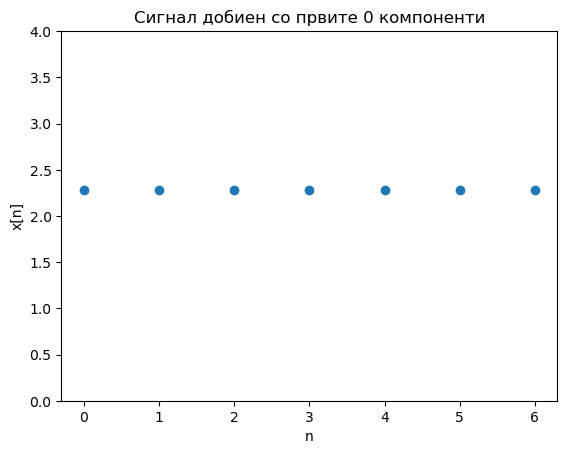

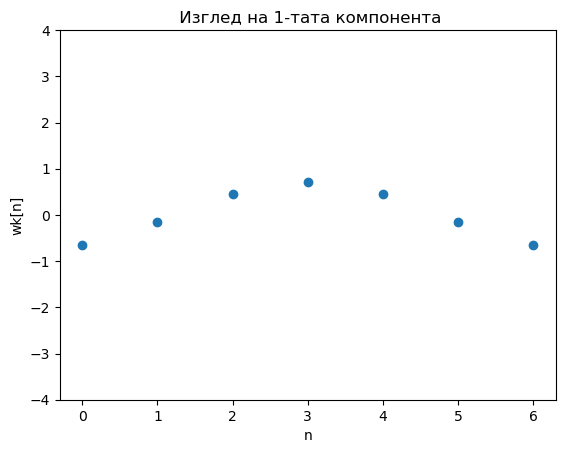

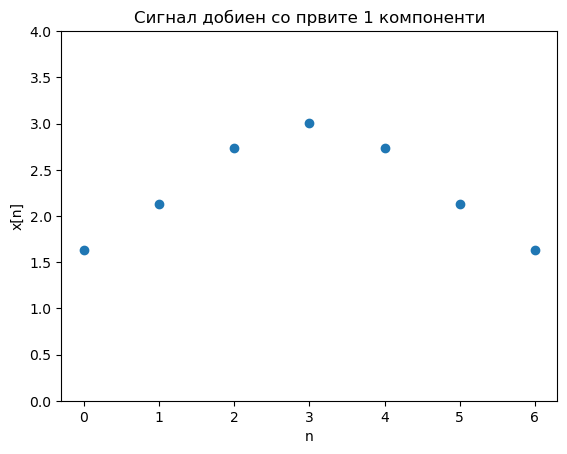

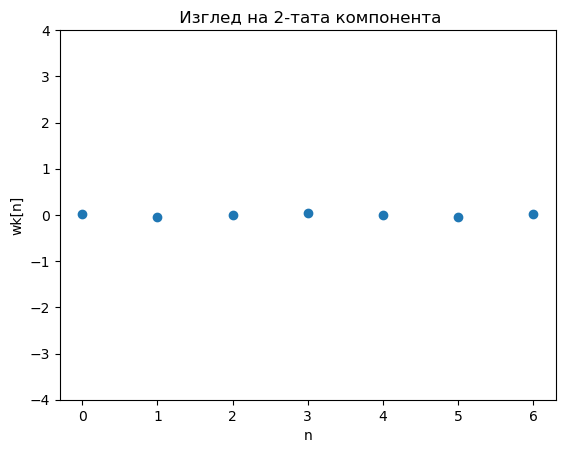

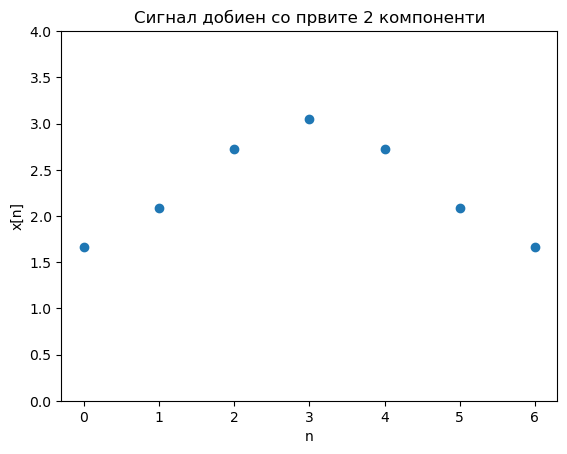

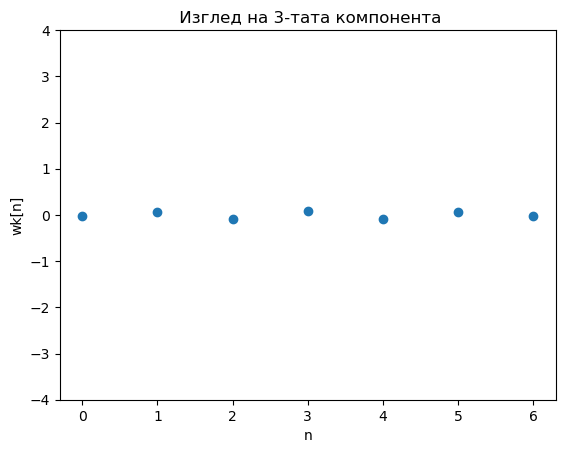

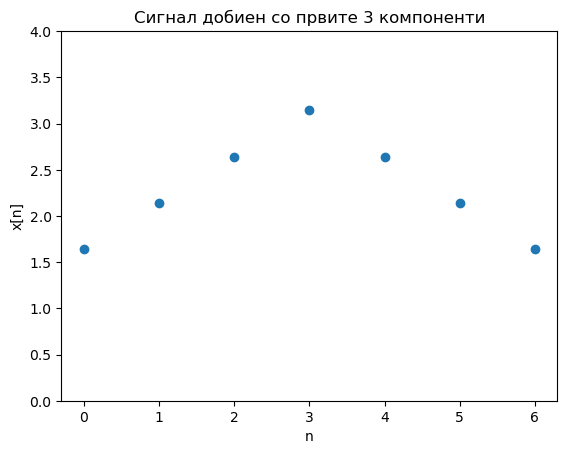

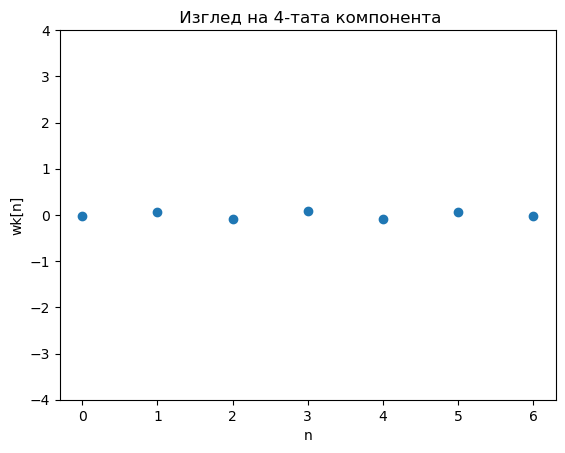

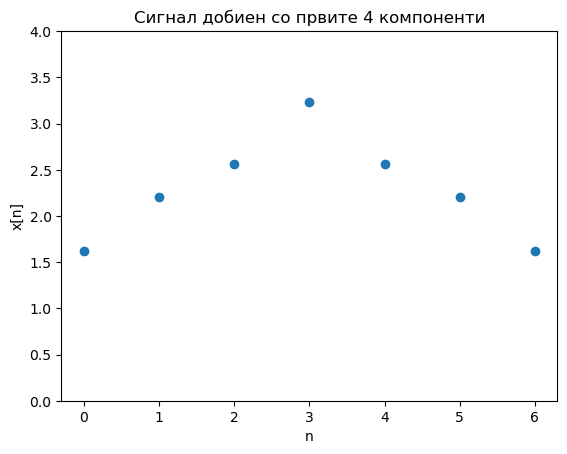

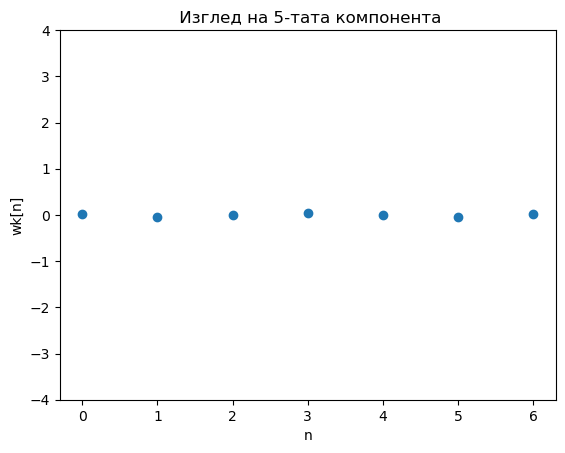

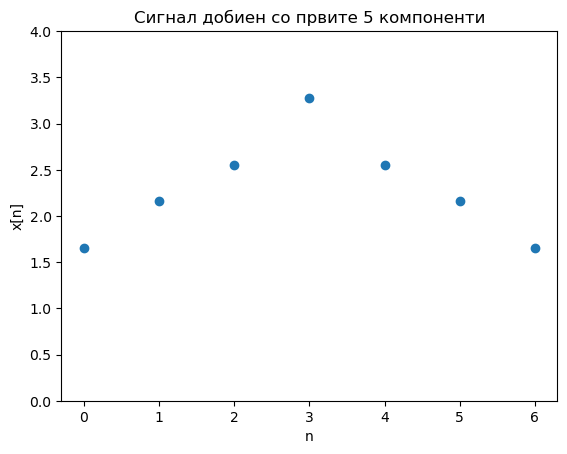

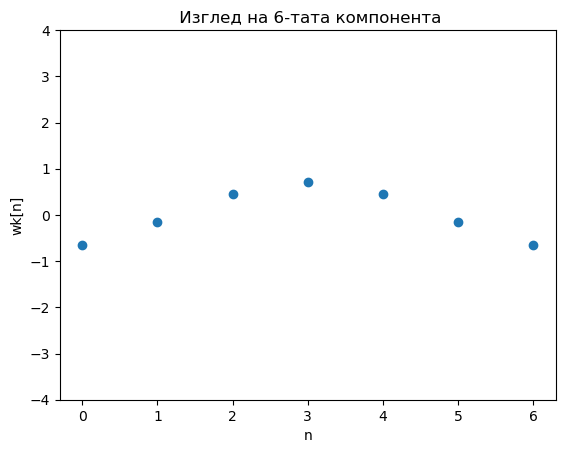

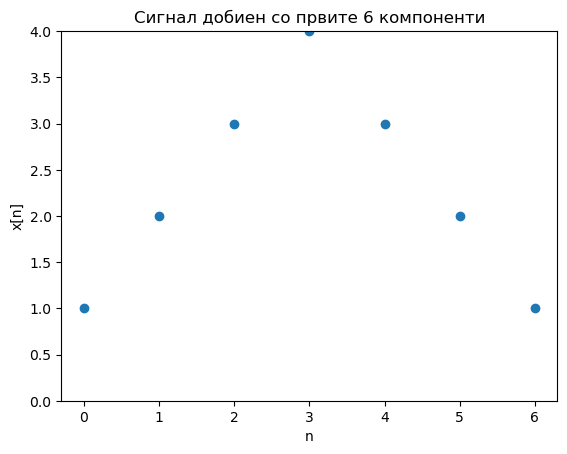

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import math
import cmath
from scipy.fft import fft, ifft # gi zema samo ovie dve funkcii od bibliotekata

Ak = np.asarray([2.2857, 0.7213, 0.044, 0.0919, 0.0919, 0.044, 0.7213])
Fik = np.asarray([0, -2.6928, 0.8976, -1.7952, 1.7952, -0.8976, 2.6928])
N = 7  # Должина на низата
n=np.asarray(list(range(0,N)))
Omega = 2.0 * np.pi / 7

#xVistinski = np.asarray([1, 2, 3, 4, 3, 2, 1])
#XkVistisnki = fft(xVistinski)
#print(abs(XkVistisnki) / 7)

x = np.zeros(N)   # вектор на кој се додаваат компонентите, една по една
for j in range(N):  # кој базисен вектор го додаваме
    wk = np.zeros(N)   # компонента (составен удел) заедно со амплитуда и фаза
    for k in range(N):
        wk[k] = (Ak[j] * cmath.exp(1j * Fik[j]) * cmath.exp(1j * (Omega * j * k))).real
        x[k] += (Ak[j] * cmath.exp(1j * Fik[j]) * cmath.exp(1j * (Omega * j * k))).real
    Razmer = np.amax(abs(wk))    
    plt.figure() # нова слика
    plt.scatter(n,wk)  # abs(Niza) дава низа од апсолутни вредности
    plt.title(' Изглед на ' + str(j) + '-тата компонента')                 
    plt.xlabel('n')
    plt.ylim([-4, 4])
#    plt.ylim([-Razmer, Razmer])

    plt.ylabel('wk[n]')
    plt.show()

    plt.figure() # нова слика
    plt.scatter(n,x)  # abs(Niza) дава низа од апсолутни вредности
    plt.title('Сигнал добиен со првите ' + str(j) + ' компоненти')                 
    plt.xlabel('n')
    plt.ylim([0, 4])    
    plt.ylabel('x[n]')
    plt.show()
    
    

# Анализа на звучен сигнал од флејта

Земен е краток исечок од неколку тонови отсвирани на флејта. Прво се прикажува временската зависност на сигналот, а потоа и фреквенциската. Следи сечење на сигналот на делови и проучување на деловите (првиот во овој случај). Овој и други сигнали се достапни овде: https://www.dsprelated.com/freebooks/pasp/Sound_Examples.html

 стапка на земање примероци (фреквенција)  44100 Херци
примероци  283584


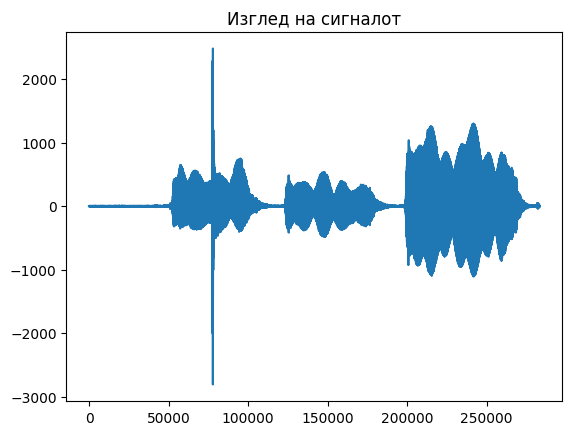

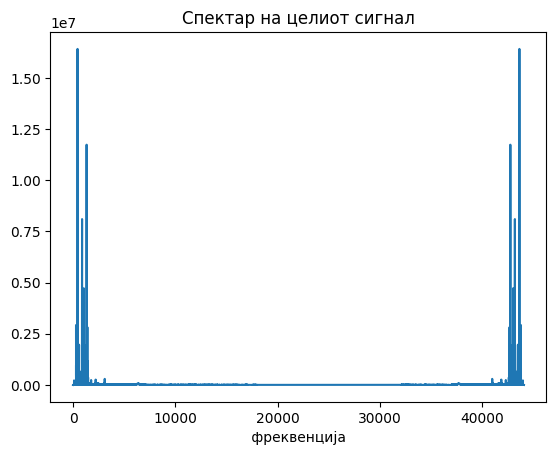

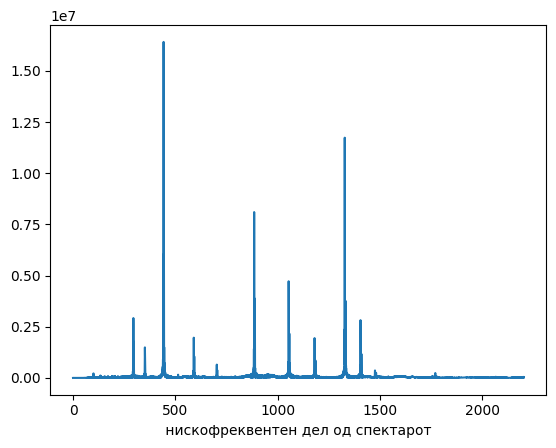

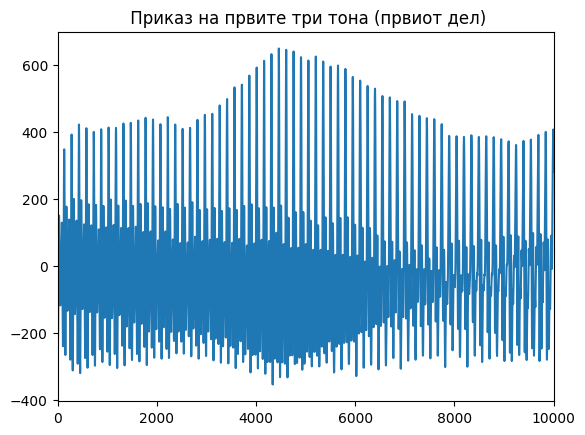

(0.0, 3000.0)

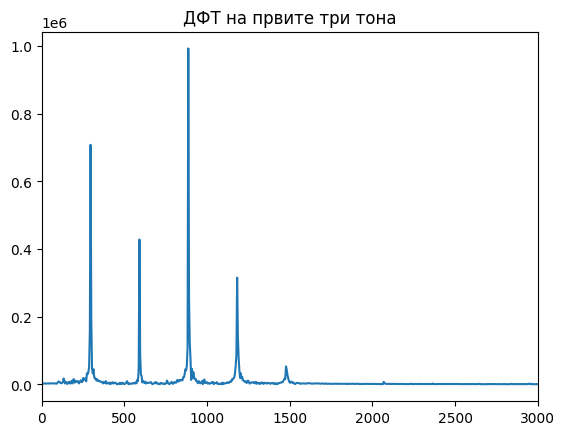

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cmath
from scipy.fft import fft, ifft # gi zema samo ovie dve funkcii od bibliotekata
from scipy.io import wavfile
import sounddevice as sd



samplerate, sig = wavfile.read('Flejta.wav') # со ова се чита звук снимен во WAV облик 
# (треба да ја имате снимено на компјутерот кај што е кодот)
print(' стапка на земање примероци (фреквенција) ', samplerate, 'Херци')
# најголемата фреквенција е половина од тоа - 22 050 Херци
data = sig[:, 0]
N = len(data)
print('примероци ', N)
#print(data[-100:])

sd.play(sig, samplerate)

n = np.asarray(list(range(0,N)))   # реден број на примерокот (дигитално време)
frek = np.linspace(0,samplerate, N) # N фреквенции до најголемата фреквенција 
plt.figure()
plt.plot(n, data)
plt.title('Изглед на сигналот')
plt.show()

#Fur = fft(data[:, 1])
Fur = fft(data)
#  целиот спектар

#print(data[:10])
#print(Fur[:10])

#plt.figure()
plt.plot(frek, abs(Fur)) 
plt.title('Спектар на целиот сигнал')
#plt.xlim([0, samplerate / 6])
plt.xlabel(' фреквенција ')
plt.show()



# цртање на нискиот дел од спектарот

M = N // 20 
Niski = Fur[0:M]  # првите M примероци од спектарот
frek = np.linspace(0,samplerate * M / N, M) # најниските M фреквенции

plt.figure()
plt.plot(frek, abs(Niski)) 
plt.xlabel(' нискофреквентен дел од спектарот ')
plt.show()
#plt.xlim([0, N // 8])

# цртање на почетокот од сигналот
Dolzhina = 10000
#PrvDel = data[120000: 190000]
PrvDel = data[53000: 63000]
M = len(PrvDel)
FurPrv = fft(PrvDel)

niza = np.asarray(list(range(M)))
frekPrv = np.linspace(0, samplerate, M)

plt.plot(niza, PrvDel)
plt.xlim([0, M])

plt.title(' Приказ на првите три тона (првиот дел)')
plt.show()
plt.figure()
plt.title('ДФТ на првите три тона')
plt.plot(frekPrv, abs(FurPrv))
plt.xlim([0, 3000])
#plt.ylim([0, 1.0e6])


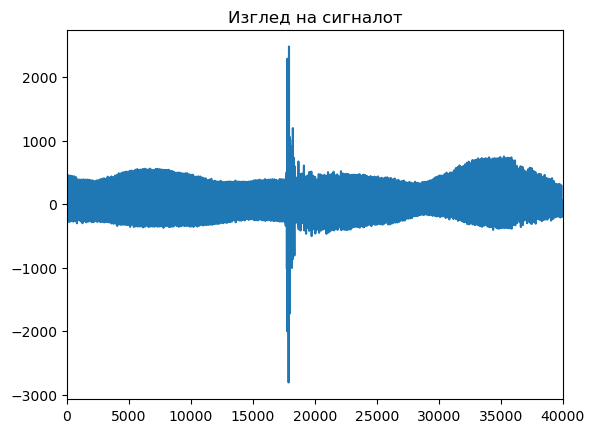

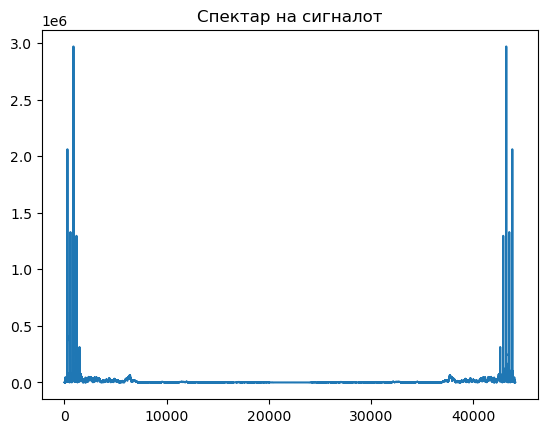

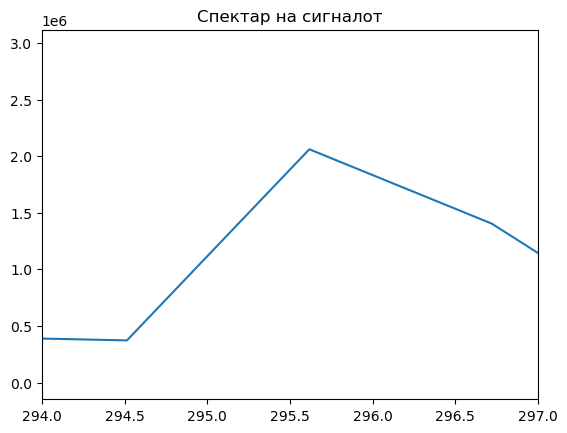

In [14]:
PrvDel = data[60000:100000]
M = len(PrvDel)
FurPrv = fft(PrvDel)

niza = np.asarray(list(range(M)))
frekPrv = np.linspace(0, samplerate, M)

plt.plot(niza, PrvDel)
plt.xlim([0, M])
plt.title('Изглед на сигналот')
plt.show()

plt.plot(frekPrv, abs(FurPrv))
plt.title('Спектар на сигналот')
plt.show()
MNizok = M // 20

nizokDel = FurPrv[: MNizok]
frekPrvNizok = np.linspace(0, samplerate / M * MNizok, MNizok)
plt.plot(frekPrvNizok, abs(nizokDel))
plt.title('Спектар на сигналот')
plt.xlim([294,297])
plt.show()
